## Compare Bias and Variance  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

Num_datasets = 50
noise_level = 0.5

max_degree = 12

N = 25

trainN = int(N * 0.9)

np.random.seed(2)

In [2]:
def make_poly(x, degree):
    """
    input: x  N by 1
    output: N by degree + 1
    """
    N = len(x)
    result = np.empty((N, degree+1))
    for d in range(degree + 1):
        result[:,d] = x ** d
        if d > 1:
            result[:, d] = (result[:, d] - result[:, d].mean()) / result[:,d].std()
    return result

def f(X):
    """
    input: x
    output: sin(x)
    """
    return np.sin(X)
        

sin function   

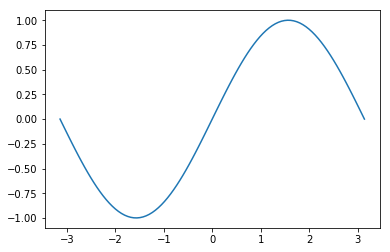

In [3]:
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)
plt.plot(x_axis, y_axis)

In [4]:
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

# allData: N by 13
allData = make_poly(X, max_degree)


train_scores = np.zeros((Num_datasets, max_degree))
test_scores = np.zeros((Num_datasets, max_degree))


train_predictions = np.zeros((trainN, Num_datasets, max_degree))
prediction_curves = np.zeros((100, Num_datasets, max_degree))

model = LinearRegression()


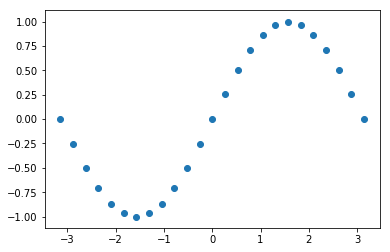

In [5]:
plt.scatter(X, f_X)

Use different degree to fit

In [6]:
for k in range(Num_datasets):
    
    Y = f_X + np.random.randn(N) * noise_level
    
    trainX, testX = allData[:trainN], allData[trainN:]
    trainY, testY = Y[:trainN], Y[trainN:]
    
    for d in range(max_degree):
        
        model.fit(trainX[:,:d+2], trainY)
        
        all_predictions = model.predict(allData[:, :d+2])
        
        x_axis_poly = make_poly(x_axis, d+1)    # true poly x
        axis_predictions = model.predict(x_axis_poly)   # true y
        prediction_curves[:, k, d] = axis_predictions
        
        train_prediction = all_predictions[:trainN]
        test_prediction = all_predictions[trainN:]
        
        train_predictions[:, k, d] = train_prediction # use to calculate bias and varaince 
        
        
        train_score = mse(train_prediction, trainY)
        test_score = mse(test_prediction, testY)
        train_scores[k, d] = train_score
        test_scores[k, d] = test_score
            

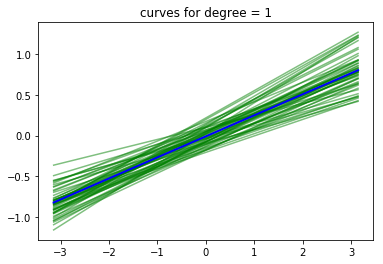

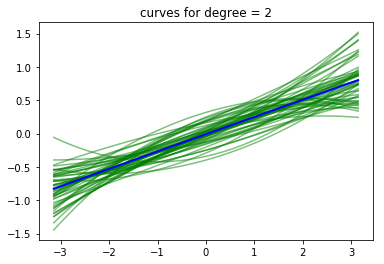

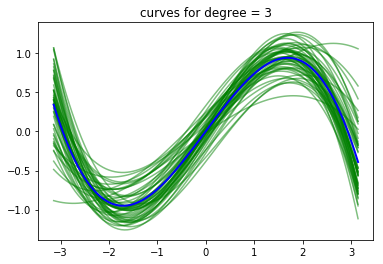

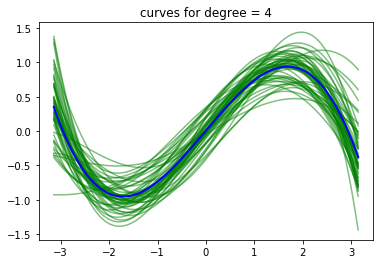

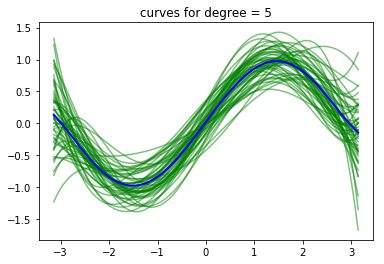

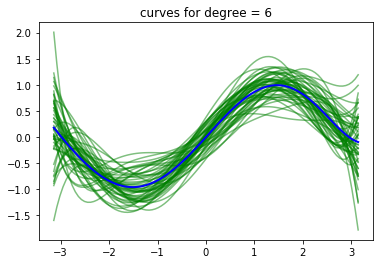

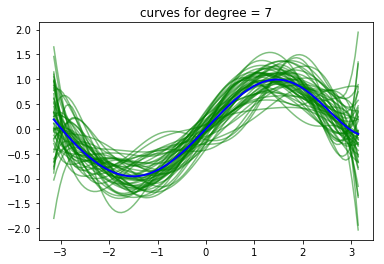

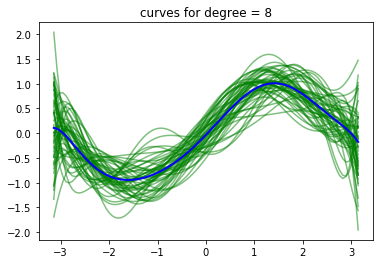

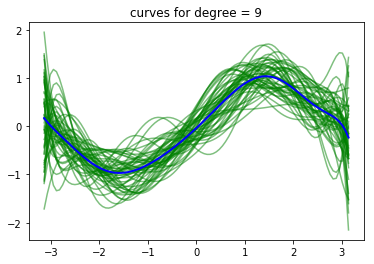

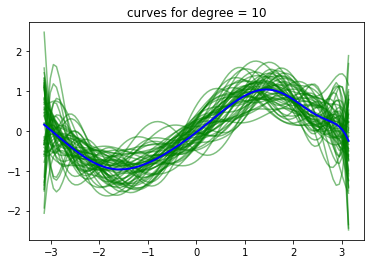

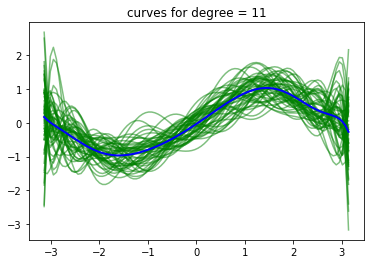

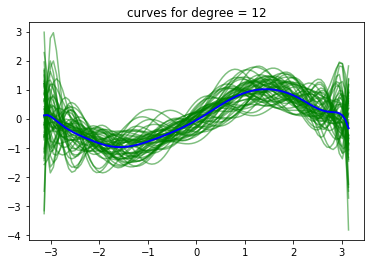

In [7]:
for d in range(max_degree):
    for k in range(Num_datasets):
        plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
    plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2)
    plt.title("curves for degree = %d" % (d + 1))
    plt.show()

Calculate bias and variance 

In [8]:
average_train_prediction = np.zeros((trainN, max_degree))
squared_bias = np.zeros(max_degree)

trueY_train = f_X[:trainN]
for d in range(max_degree):
    for i in range(trainN):
        average_train_prediction[i,d] = train_predictions[i,:,d].mean()
    squared_bias[d] = ((average_train_prediction[:,d] - trueY_train) ** 2).mean()

In [9]:
variances = np.zeros((trainN, max_degree))
for d in range(max_degree):
    for i in range(trainN):
        difference = train_predictions[i,:,d] - average_train_prediction[i,d]
        variances[i,d] = np.dot(difference, difference) / Num_datasets
variance = variances.mean(axis=0)

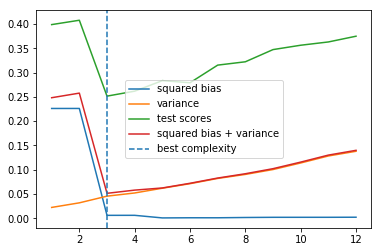

In [10]:
degrees = np.arange(max_degree) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1

plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label = 'variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

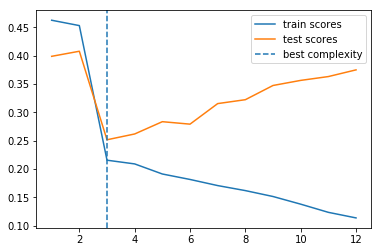

In [11]:
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label= 'test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()